<a href="https://colab.research.google.com/github/Vishalirv31/Vishalirv31/blob/Assignment/R_Vishali3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seaborn.set(rc={'figure.figsize':(25,20)})

In [ ]:
!unzip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from distutils.dir_util import copy_tree
from_dir = '/content/archive (2).zip'
to_dir = '/content/archive (2).zip'
copy_tree(from_dir, to_dir)

DistutilsFileError: ignored

In [ ]:
os.chdir("/kaggle/input/animal-image-dataset-90-different-animals/")
f = open("name of the animals.txt", "r")
names = np.loadtxt(f,dtype='str')

In [ ]:
names

array(['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison',
       'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee',
       'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog',
       'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant',
       'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla',
       'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus',
       'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish',
       'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard',
       'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi',
       'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot',
       'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine',
       'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper',
       'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid',
       'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle',
       'whale', 'wolf', 'wombat'

In [ ]:
os.chdir("/kaggle/working/animals/animals/") 
for animal in names: 
    path="/kaggle/working/animals/animals/"+animal
    for count, filename in enumerate(os.listdir(path)):
        src = filename 
        dst = animal + str(count) + ".jpg"
        os.rename(os.path.join(path, src), os.path.join(path, dst))

In [ ]:
os.chdir("/kaggle/working/animals/animals/") 
for animal in names: 
    path="/kaggle/working/animals/animals/"+animal
    os.chdir(path)
    path2="/kaggle/working/animals/"
    if os.path.isdir(path2+'train/'+animal) is False: 
        os.makedirs(path2+'train/'+animal)
        os.makedirs(path2+'test/'+animal)
        os.makedirs(path2+'valid/'+animal)
        for c in random.sample(glob.glob(animal+'*'),30): 
            shutil.move(c,path2+'train/'+animal)
        for c in random.sample(glob.glob(animal+'*'),20): 
            shutil.move(c,path2+'valid/'+animal)
        for c in random.sample(glob.glob(animal+'*'),10): 
            shutil.move(c,path2+'test/'+animal)

In [ ]:
train_path = "/kaggle/working/animals/train"
test_path = "/kaggle/working/animals/test"
valid_path = "/kaggle/working/animals/valid"

In [14]:
list_names = names.tolist()
list_names

NameError: ignored

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=list_names, batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=list_names, batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=list_names, batch_size=5, shuffle=False)

Found 2700 images belonging to 90 classes.
Found 1800 images belonging to 90 classes.
Found 900 images belonging to 90 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

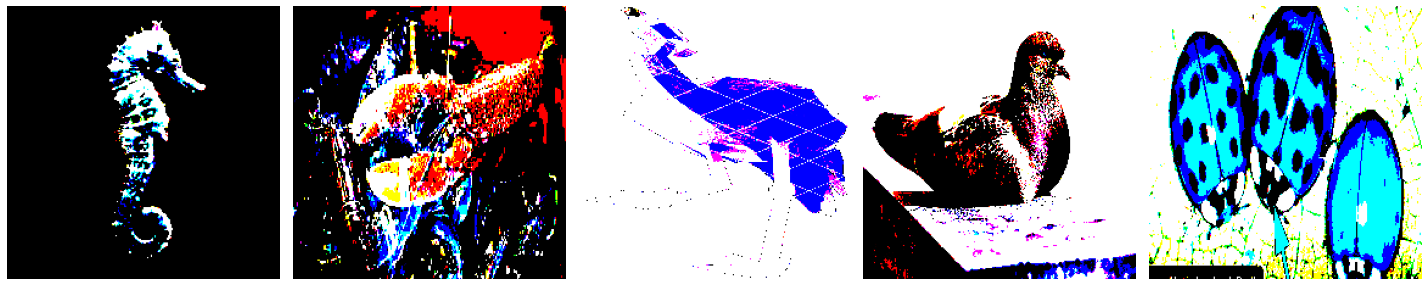

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0

In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=90, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 90)                18063450  
Total params: 18,082,842
Trainable params: 18,082,842
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5
540/540 - 192s - loss: 0.5597 - accuracy: 0.9096 - val_loss: 4.2548 - val_accuracy: 0.2361
Epoch 2/5
540/540 - 192s - loss: 0.0240 - accuracy: 0.9970 - val_loss: 5.0547 - val_accuracy: 0.2489
Epoch 3/5
540/540 - 191s - loss: 0.0061 - accuracy: 0.9993 - val_loss: 4.9210 - val_accuracy: 0.2467
Epoch 4/5
540/540 - 191s - loss: 0.0036 - accuracy: 0.9996 - val_loss: 5.4578 - val_accuracy: 0.2411
Epoch 5/5
540/540 - 191s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 5.9616 - val_accuracy: 0.2439


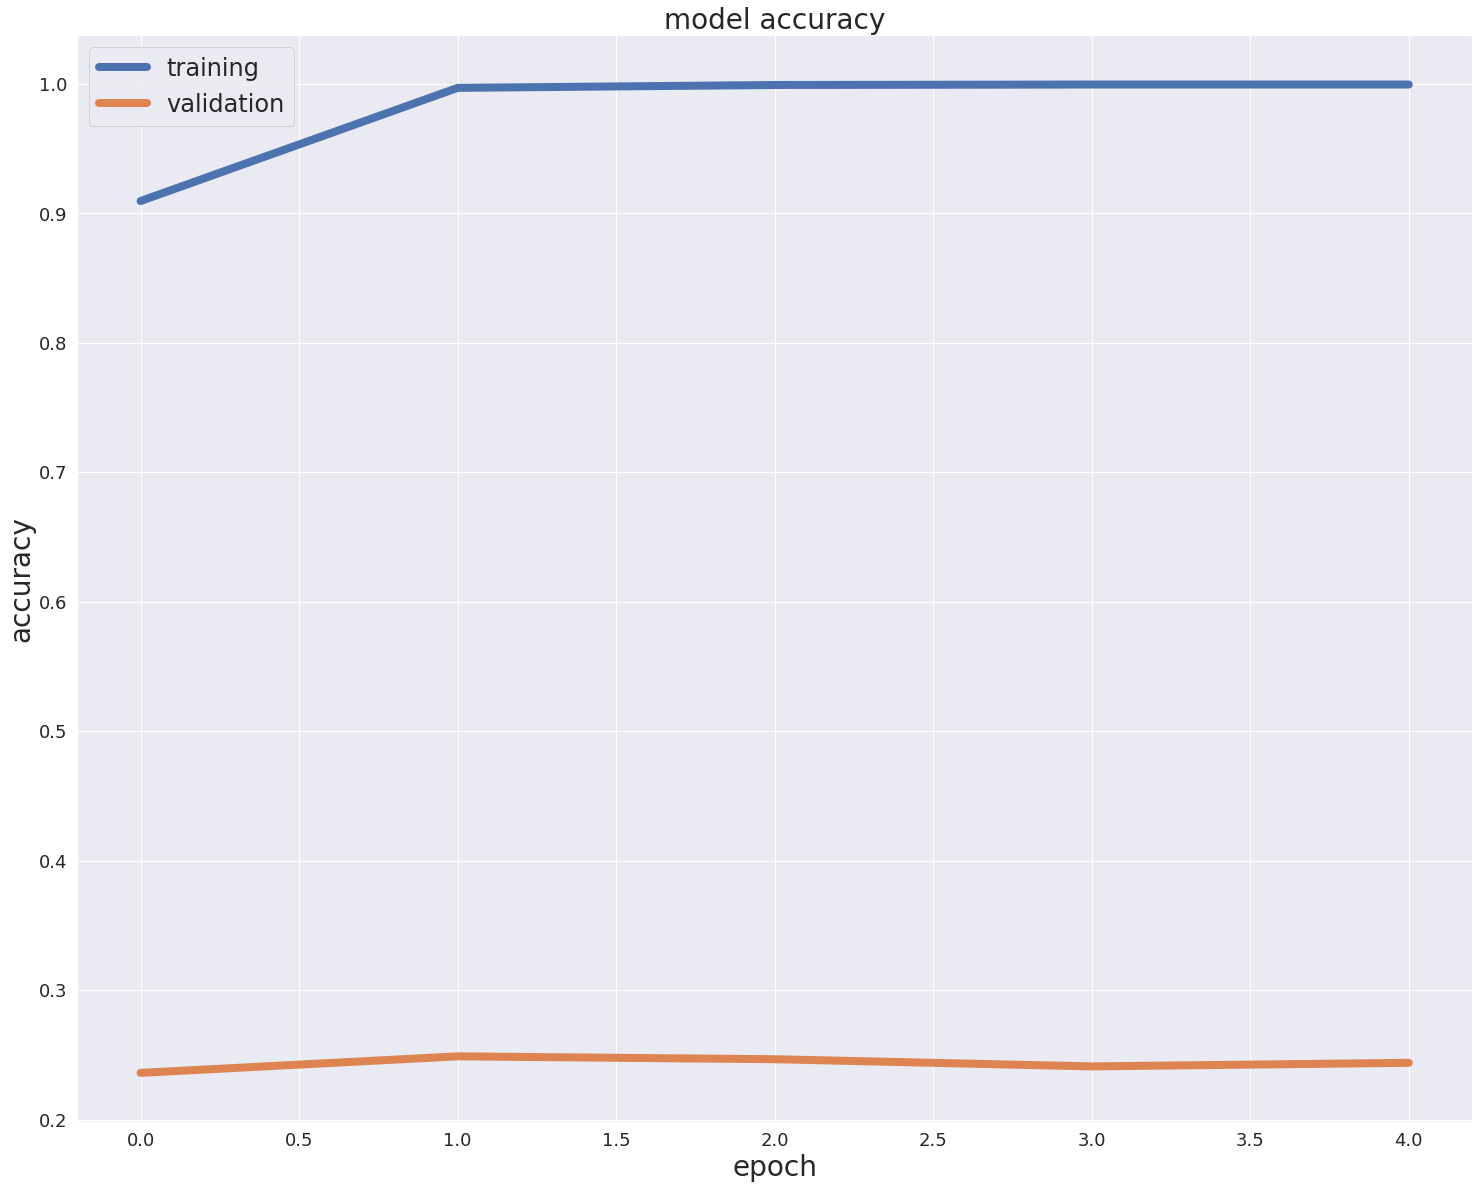

In [ ]:
plt.plot(history.history['accuracy'], linewidth=8)
plt.plot(history.history['val_accuracy'], linewidth=8)
plt.title('model accuracy',fontsize=28)
plt.ylabel('accuracy',fontsize=28)
plt.xlabel('epoch',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['training', 'validation'], loc='upper left',fontsize=24)
plt.show()

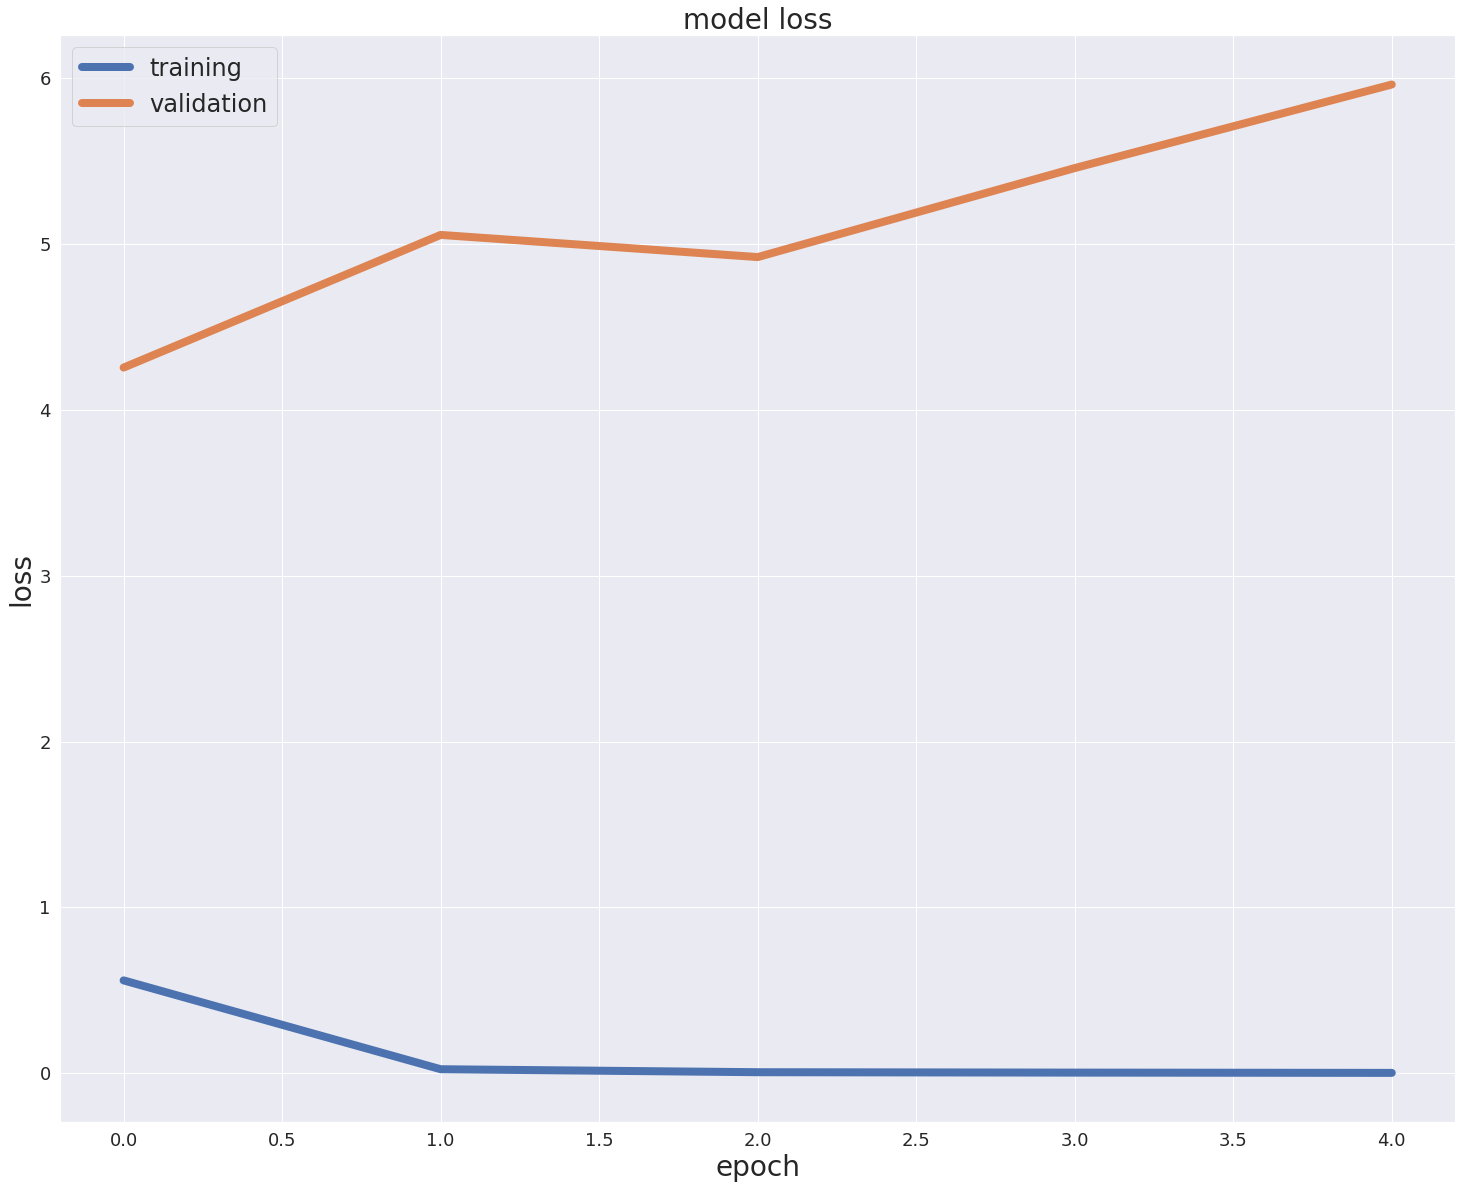

In [ ]:
plt.plot(history.history['loss'], linewidth=8)
plt.plot(history.history['val_loss'], linewidth=8)
plt.title('model loss',fontsize=28)
plt.ylabel('loss',fontsize=28)
plt.xlabel('epoch',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['training', 'validation'], loc='upper left',fontsize=24)
plt.show()

In [ ]:
test_imgs, test_labels = next(test_batches)

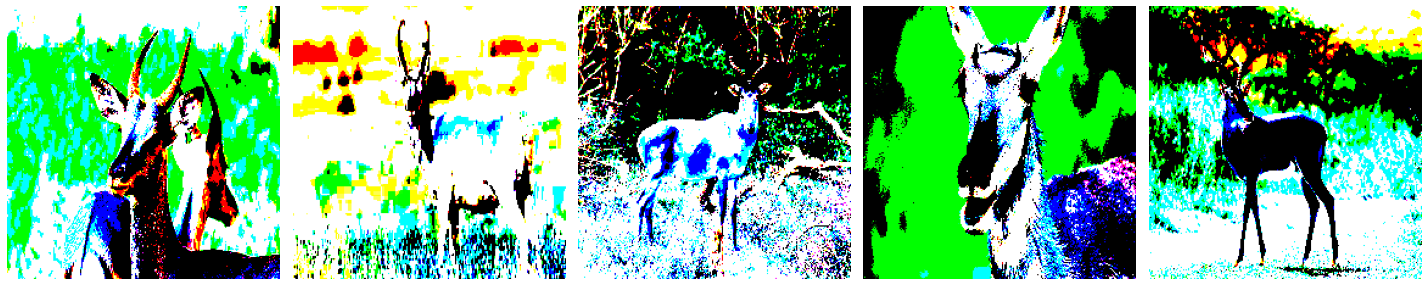

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0

In [ ]:
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=18)
    plt.yticks(tick_marks, classes,fontsize=18)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.tight_layout()
    plt.ylabel('True label',fontsize=24)
    plt.xlabel('Predicted label',fontsize=24)

In [ ]:
test_batches.class_indices

{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

Normalized confusion matrix
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.3 ... 0.  0.1 0.1]
 ...
 [0.  0.  0.  ... 0.1 0.  0.1]
 [0.  0.  0.  ... 0.  0.2 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


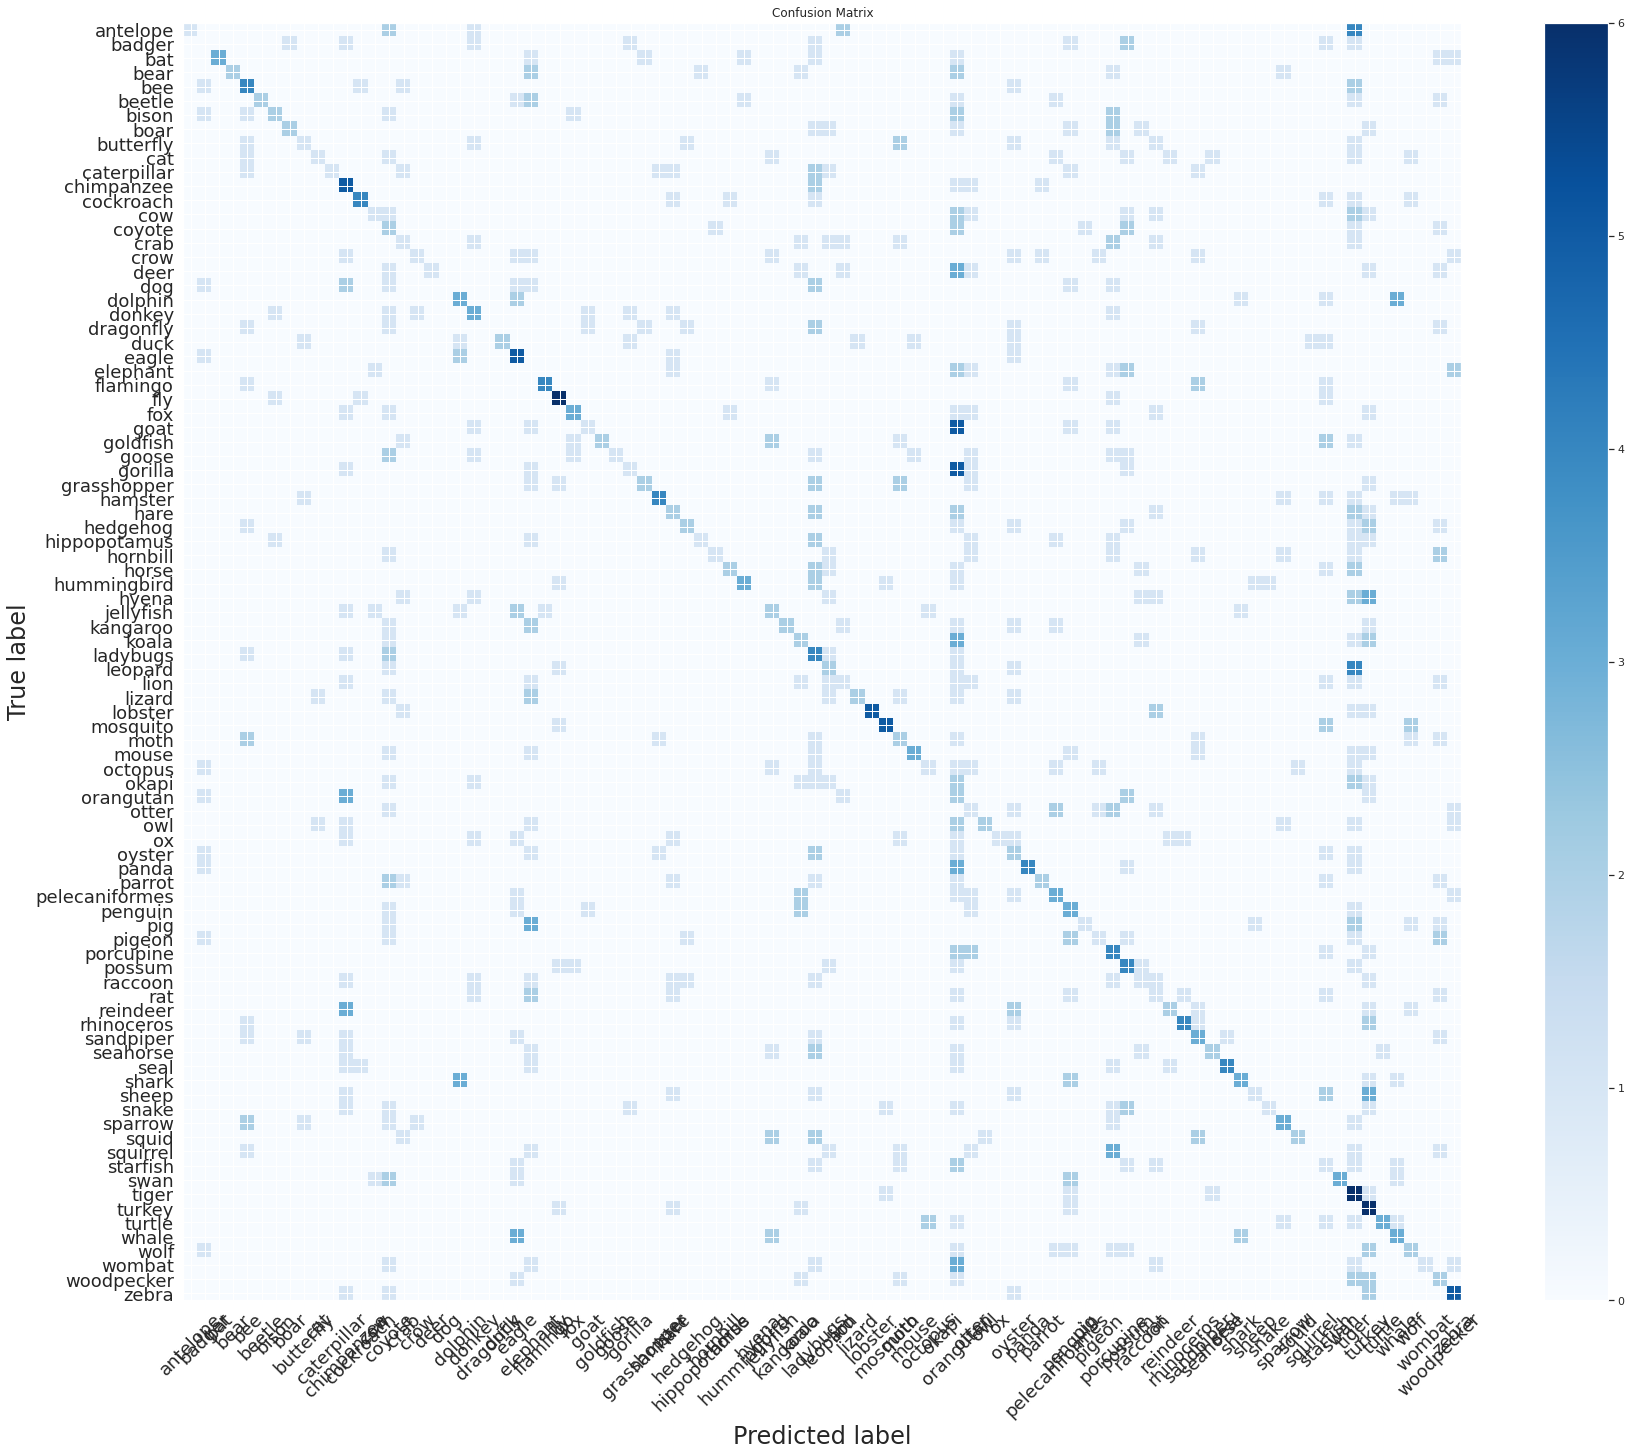

In [ ]:
cm_plot_labels = list_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
f.close()